In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [33]:
# First load each DataFrame separately
df_country1 = pd.read_csv("C:/Users/Student/Documents/kaim documents/data/data/benin-malanville.csv")
df_country2 = pd.read_csv("C:/Users/Student/Documents/kaim documents/data/data/sierraleone-bumbuna.csv")
df_country3 = pd.read_csv("C:/Users/Student/Documents/kaim documents/data/data/togo-dapaong_qc.csv")

# Then create the countries dictionary
countries = {
    'Benin': df_country1,
    'Sierra Leone': df_country2,
    'Togo': df_country3
}
# Extract solar metrics
solar_metrics = ['GHI', 'DNI', 'DHI', 'WS']

# Create summary statistics table
summary_stats = pd.concat(
    [df[solar_metrics].describe().T.assign(Country=name) 
     for name, df in countries.items()]
).set_index('Country', append=True).swaplevel()

print("Summary Statistics:")
display(summary_stats)

Summary Statistics:


count        mean         std   min  25%  50%    75%  \
Country                                                                     
Benin        GHI  525600.0  240.559452  331.131327 -12.9 -2.0  1.8  483.4   
             DNI  525600.0  167.187516  261.710501  -7.8 -0.5 -0.1  314.2   
             DHI  525600.0  115.358961  158.691074 -12.6 -2.1  1.6  216.3   
             WS   525600.0    2.121113    1.603466   0.0  1.0  1.9    3.1   
Sierra Leone GHI  525600.0  201.957515  298.495150 -19.5 -2.8  0.3  362.4   
             DNI  525600.0  116.376337  218.652659  -7.8 -0.3 -0.1  107.0   
             DHI  525600.0  113.720571  158.946032 -17.9 -3.8 -0.1  224.7   
             WS   525600.0    1.146113    1.239248   0.0  0.0  0.8    2.0   
Togo         GHI  525600.0  230.555040  322.532347 -12.7 -2.2  2.1  442.4   
             DNI  525600.0  151.258469  250.956962   0.0  0.0  0.0  246.4   
             DHI  525600.0  116.444352  156.520714   0.0  0.0  2.5  215.7   
             WS   525600.0    2.368093    1.462668   0.0  1.4  2.2    3.2   

                     max  
Country                   
Benin        GHI  1413.0  
             DNI   952.3  
             DHI   759.2  
             WS     19.5  
Sierra Leone GHI  1499.0  
             DNI   946.0  
             DHI   892.0  
             WS     19.2  
Togo         GHI  1424.0  
             DNI  1004.5  
             DHI   805.7  
             WS     16.1

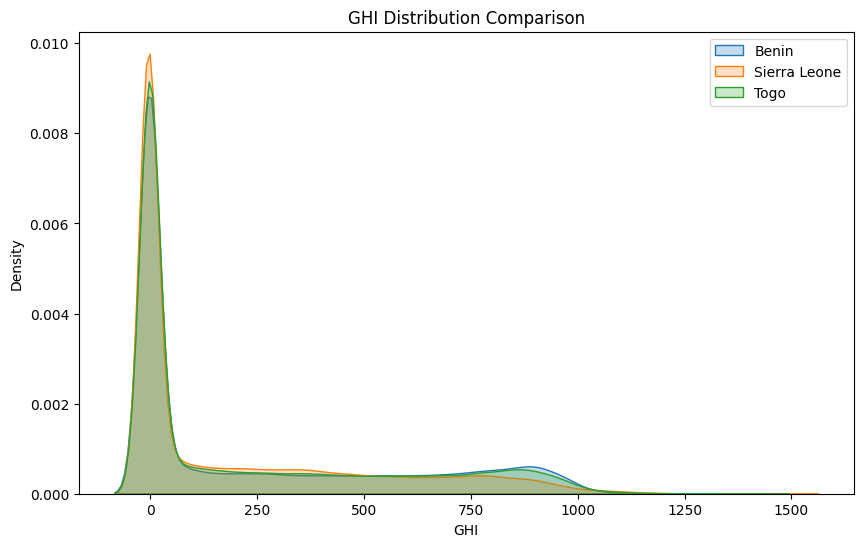

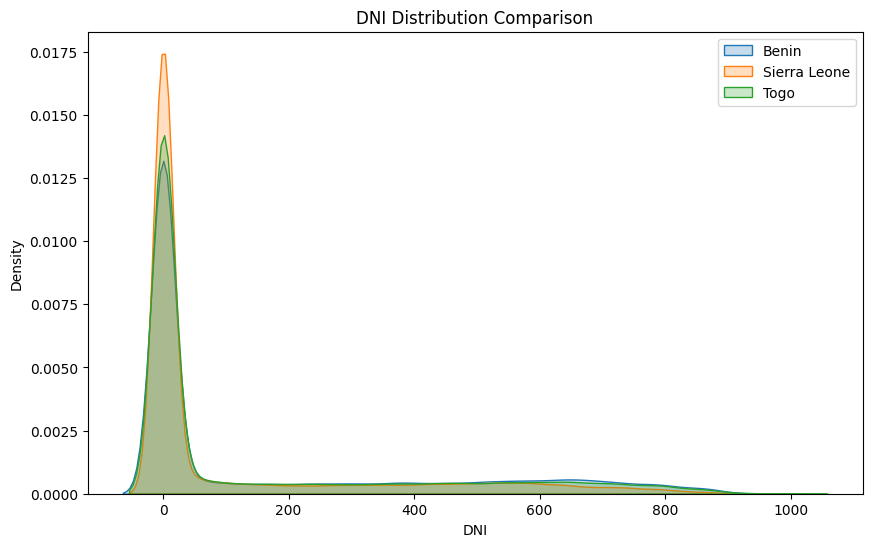

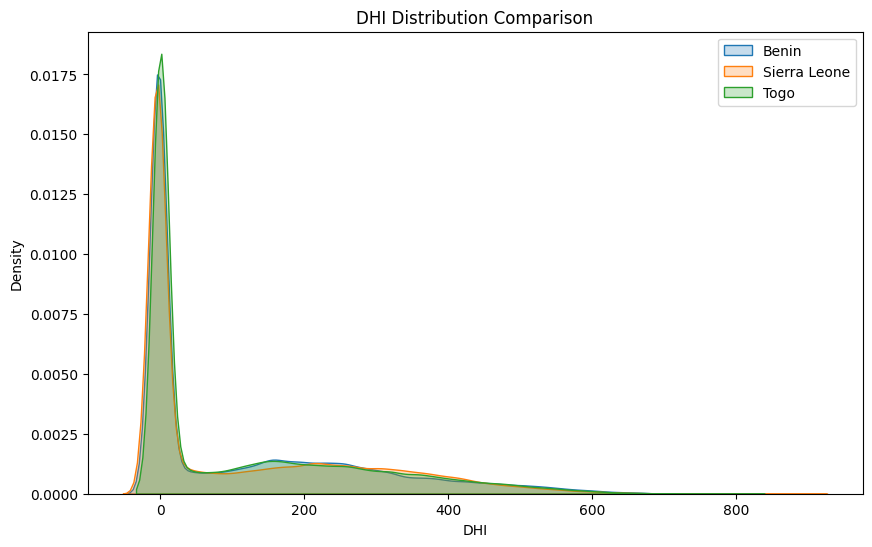

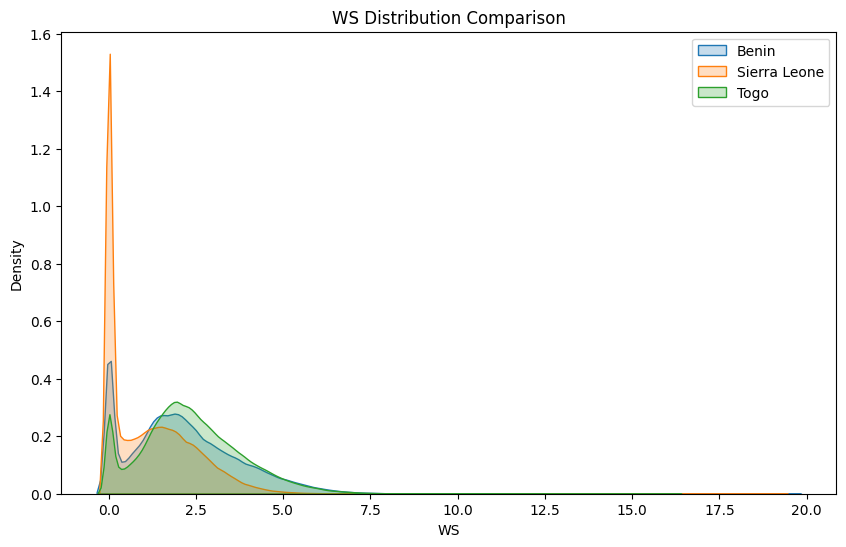

In [34]:
def plot_metric_comparison(metric):
    plt.figure(figsize=(10, 6))
    for name, df in countries.items():
        sns.kdeplot(df[metric].dropna(), label=name, fill=True)
    plt.title(f'{metric} Distribution Comparison')
    plt.xlabel(metric)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

for metric in solar_metrics:
    plot_metric_comparison(metric)

In [35]:
from itertools import combinations

def compare_countries(metric):
    print(f"\n=== {metric} Statistical Comparison ===")
    country_pairs = combinations(countries.keys(), 2)
    
    for pair in country_pairs:
        data1 = countries[pair[0]][metric].dropna()
        data2 = countries[pair[1]][metric].dropna()
        
        # Welch's t-test for unequal variances
        t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)
        
        print(f"\n{pair[0]} vs {pair[1]}:")
        print(f"Means: {data1.mean():.2f} vs {data2.mean():.2f}")
        print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
        if p_value < 0.05:
            print("Significantly different (p < 0.05)")
        else:
            print("Not significantly different")

for metric in solar_metrics[:3]:  # Only for GHI, DNI, DHI
    compare_countries(metric)


=== GHI Statistical Comparison ===

Benin vs Sierra Leone:
Means: 240.56 vs 201.96
T-statistic: 62.77, p-value: 0.0000
Significantly different (p < 0.05)

Benin vs Togo:
Means: 240.56 vs 230.56
T-statistic: 15.69, p-value: 0.0000
Significantly different (p < 0.05)

Sierra Leone vs Togo:
Means: 201.96 vs 230.56
T-statistic: -47.18, p-value: 0.0000
Significantly different (p < 0.05)

=== DNI Statistical Comparison ===

Benin vs Sierra Leone:
Means: 167.19 vs 116.38
T-statistic: 108.02, p-value: 0.0000
Significantly different (p < 0.05)

Benin vs Togo:
Means: 167.19 vs 151.26
T-statistic: 31.85, p-value: 0.0000
Significantly different (p < 0.05)

Sierra Leone vs Togo:
Means: 116.38 vs 151.26
T-statistic: -75.98, p-value: 0.0000
Significantly different (p < 0.05)

=== DHI Statistical Comparison ===

Benin vs Sierra Leone:
Means: 115.36 vs 113.72
T-statistic: 5.29, p-value: 0.0000
Significantly different (p < 0.05)

Benin vs Togo:
Means: 115.36 vs 116.44
T-statistic: -3.53, p-value: 0.0004

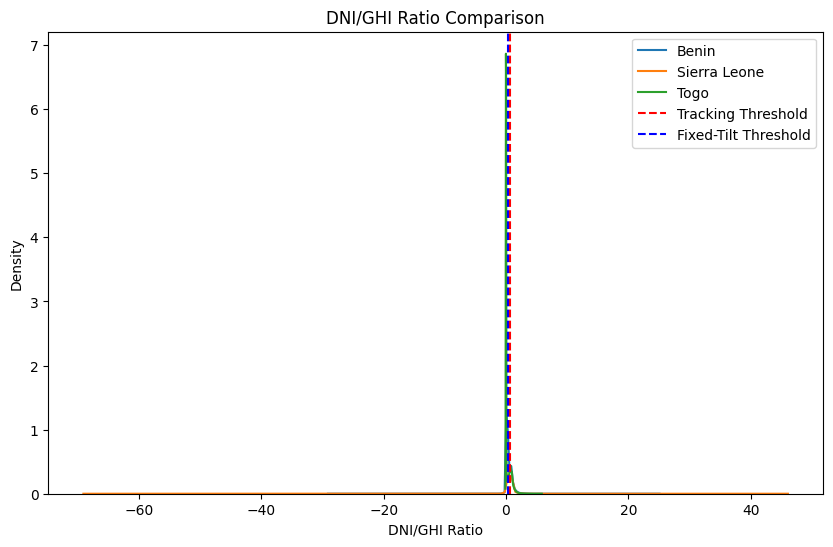


DNI/GHI Ratio Analysis with Data Validation:

Benin:
Valid data points: 266390/525600 (50.7%)
Mean ratio = 0.61 - Tracking recommended

Sierra Leone:
Valid data points: 263829/525600 (50.2%)
Mean ratio = 0.43 - Either system viable

Togo:
Valid data points: 267553/525600 (50.9%)
Mean ratio = 0.57 - Either system viable


In [36]:
plt.figure(figsize=(10, 6))
for name, df in countries.items():
    ratio = (df['DNI']/df['GHI']).dropna()
    sns.kdeplot(ratio, label=name)
plt.axvline(x=0.6, color='red', linestyle='--', label='Tracking Threshold')
plt.axvline(x=0.4, color='blue', linestyle='--', label='Fixed-Tilt Threshold')
plt.title('DNI/GHI Ratio Comparison')
plt.xlabel('DNI/GHI Ratio')
plt.ylabel('Density')
plt.legend()
plt.show()
# Calculate DNI/GHI ratio with proper NaN handling
print("\nDNI/GHI Ratio Analysis with Data Validation:")

for name, df_country in countries.items():
    # Ensure we have valid data points where both DNI and GHI exist and are > 0
    valid_mask = (df_country['DNI'].notna()) & (df_country['GHI'].notna()) & (df_country['GHI'] > 0)
    valid_count = valid_mask.sum()
    total_count = len(df_country)
    
    print(f"\n{name}:")
    print(f"Valid data points: {valid_count}/{total_count} ({valid_count/total_count:.1%})")
    
    if valid_count > 0:
        ratio = (df_country.loc[valid_mask, 'DNI'] / df_country.loc[valid_mask, 'GHI']).mean()
        system_type = "Tracking recommended" if ratio > 0.6 else "Fixed-tilt recommended" if ratio < 0.4 else "Either system viable"
        print(f"Mean ratio = {ratio:.2f} - {system_type}")
    else:
        print("Insufficient valid data for ratio calculation")
        print("Possible reasons:")
        print("- Missing DNI or GHI values")
        print("- Zero GHI values (nighttime measurements?)")

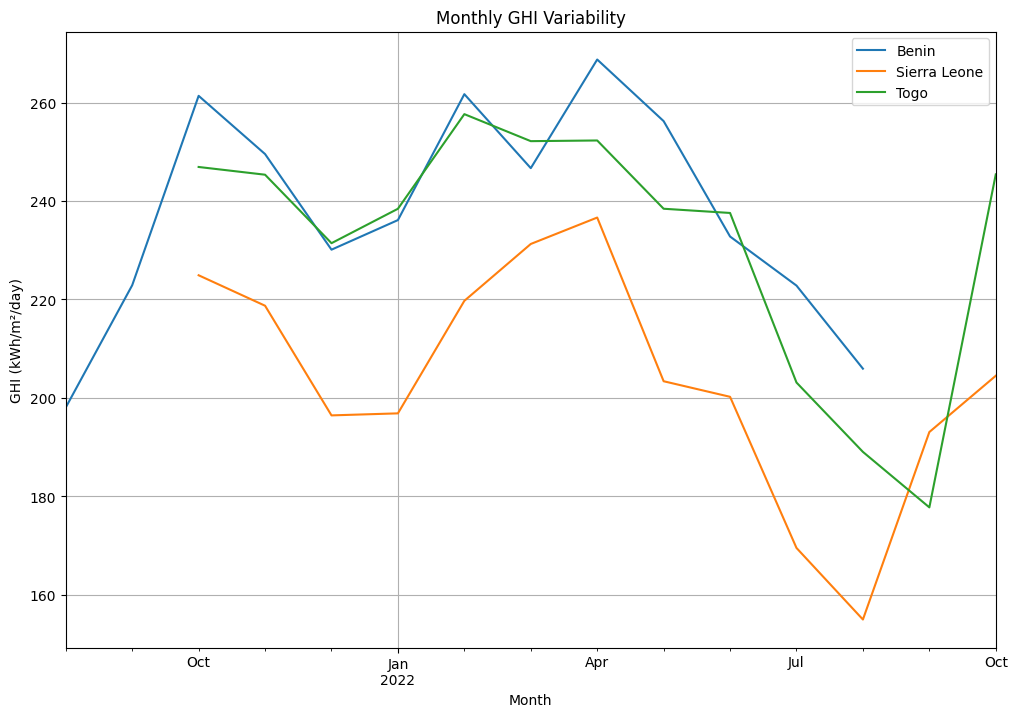

In [37]:
# Convert timestamp to datetime first
for df_country in countries.values():
    df_country['Timestamp'] = pd.to_datetime(df_country['Timestamp'])

# Then try plotting again
if 'Timestamp' in df_country1.columns:
    plt.figure(figsize=(12, 8))
    for name, df in countries.items():
        monthly = df.set_index('Timestamp')['GHI'].resample('ME').mean()
        monthly.plot(label=name)
    plt.title('Monthly GHI Variability')
    plt.ylabel('GHI (kWh/m²/day)')
    plt.xlabel('Month')
    plt.legend()
    plt.grid()
    plt.show()

In [38]:
def evaluate_ghi_potential(df):
    """Classify solar potential based on GHI"""
    avg_ghi = df['GHI'].mean()
    if avg_ghi > 5.0:
        return "Excellent potential", avg_ghi
    elif avg_ghi > 4.0:
        return "Good potential", avg_ghi
    elif avg_ghi > 3.5:
        return "Moderate potential", avg_ghi
    else:
        return "Marginal for utility-scale", avg_ghi

print("=== Primary Metric (GHI) Evaluation ===")
for name, df in countries.items():
    rating, value = evaluate_ghi_potential(df)
    print(f"{name}: {value:.2f} kWh/m²/day → {rating}")

=== Primary Metric (GHI) Evaluation ===
Benin: 240.56 kWh/m²/day → Excellent potential
Sierra Leone: 201.96 kWh/m²/day → Excellent potential
Togo: 230.56 kWh/m²/day → Excellent potential


In [39]:
def safe_dni_ghi_ratio(df):
    """
    Calculate DNI/GHI ratio with robust NaN and zero handling
    Returns: (mean_ratio, valid_data_points, total_data_points)
    """
    # Filter valid cases where both DNI and GHI exist and GHI > 0
    valid_mask = df['DNI'].notna() & df['GHI'].notna() & (df['GHI'] > 0)
    valid_count = valid_mask.sum()
    total_count = len(df)
    
    if valid_count == 0:
        return np.nan, 0, total_count
    
    ratio = (df.loc[valid_mask, 'DNI'] / df.loc[valid_mask, 'GHI']).mean()
    return ratio, valid_count, total_count

print("\n=== System Type Recommendation with Data Validation ===")
for name, df in countries.items():
    ratio, valid, total = safe_dni_ghi_ratio(df)
    
    print(f"\n{name}:")
    print(f"Valid data points: {valid}/{total} ({valid/total:.1%})")
    
    if pd.isna(ratio):
        print("Cannot calculate ratio - insufficient valid data")
        print("Possible causes: Missing DNI/GHI data or all GHI values are zero")
        recommendation = "Data quality issue - cannot determine"
    else:
        print(f"DNI/GHI ratio = {ratio:.2f}")
        if ratio > 0.6:
            recommendation = "Tracking system recommended"
        elif ratio < 0.4:
            recommendation = "Fixed-tilt system preferred"
        else:
            recommendation = "Hybrid approach viable"
    
    print("Recommendation:", recommendation)


=== System Type Recommendation with Data Validation ===

Benin:
Valid data points: 266390/525600 (50.7%)
DNI/GHI ratio = 0.61
Recommendation: Tracking system recommended

Sierra Leone:
Valid data points: 263829/525600 (50.2%)
DNI/GHI ratio = 0.43
Recommendation: Hybrid approach viable

Togo:
Valid data points: 267553/525600 (50.9%)
DNI/GHI ratio = 0.57
Recommendation: Hybrid approach viable


In [40]:
def evaluate_wind_conditions(df):
    """Assess mounting requirements based on wind speed"""
    ws_95 = df['WS'].quantile(0.95)
    if ws_95 > 15:
        return "Robust mounting required", ws_95
    elif df['WS'].mean() < 5:
        return "May need panel cleaning", ws_95
    else:
        return "Standard mounting sufficient", ws_95

print("\n=== Wind Considerations ===")
for name, df in countries.items():
    assessment, value = evaluate_wind_conditions(df)
    print(f"{name}: 95th percentile WS = {value:.1f} m/s → {assessment}")


=== Wind Considerations ===
Benin: 95th percentile WS = 5.0 m/s → May need panel cleaning
Sierra Leone: 95th percentile WS = 3.4 m/s → May need panel cleaning
Togo: 95th percentile WS = 5.0 m/s → May need panel cleaning


In [41]:
def evaluate_consistency(df):
    """Assess output predictability"""
    dhi_ratio = (df['DHI']/df['GHI']).mean()
    if dhi_ratio < 0.3:
        return "Highly predictable output", dhi_ratio
    elif dhi_ratio > 0.6:
        return "Diffuse-light resilient", dhi_ratio
    else:
        return "Moderate predictability", dhi_ratio

print("\n=== Output Consistency ===")
for name, df in countries.items():
    consistency, ratio = evaluate_consistency(df)
    print(f"{name}: DHI/GHI ratio = {ratio:.2f} → {consistency}")


=== Output Consistency ===
Benin: DHI/GHI ratio = nan → Moderate predictability
Sierra Leone: DHI/GHI ratio = nan → Moderate predictability
Togo: DHI/GHI ratio = inf → Diffuse-light resilient


c:\Users\Student\solar-challenge-week-0\.venv\lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [42]:
# Enhanced data cleaning pipeline
for name, df in countries.items():
    # 1. Convert all irradiance values to numeric, coercing errors
    irrad_cols = ['GHI', 'DHI', 'DNI']
    df[irrad_cols] = df[irrad_cols].apply(pd.to_numeric, errors='coerce')
    
    # 2. Handle negative values (common in some datasets)
    df[irrad_cols] = df[irrad_cols].clip(lower=0)
    
    # 3. Handle nighttime zero GHI values
    night_mask = (df['GHI'] == 0) & (df['DHI'] == 0) & (df['DNI'] == 0)
    df.loc[night_mask, irrad_cols] = np.nan  # Set full nighttime to NaN
    
    # 4. Remove physically impossible values (GHI < DHI cases)
    invalid_mask = df['GHI'] < df['DHI']
    df.loc[invalid_mask, irrad_cols] = np.nan
    
    # 5. Forward-fill small gaps (max 1 hour)
    df[irrad_cols] = df[irrad_cols].ffill(limit=1)

In [43]:
print("\n=== Advanced Data Quality Report ===")
for name, df in countries.items():
    print(f"\n{name}:")
    
    # Basic stats
    print("GHI stats:")
    print(df['GHI'].describe())
    
    # Zero values check
    zero_ghi = (df['GHI'] == 0).sum()
    zero_dhi = (df['DHI'] == 0).sum()
    print(f"\nZero GHI count: {zero_ghi} ({zero_ghi/len(df):.1%})")
    print(f"Zero DHI count: {zero_dhi} ({zero_dhi/len(df):.1%})")
    
    # Impossible values check
    impossible = (df['GHI'] < df['DHI']).sum()
    print(f"Physically impossible cases (GHI < DHI): {impossible}")
    
    # Nighttime detection
    night_samples = ((df['GHI'] == 0) & (df['DHI'] == 0)).sum()
    print(f"Probable nighttime samples: {night_samples}")


=== Advanced Data Quality Report ===

Benin:
GHI stats:
count    263404.000000
mean        482.246190
std         318.790359
min           0.000000
25%         187.200000
50%         482.100000
75%         775.000000
max        1413.000000
Name: GHI, dtype: float64

Zero GHI count: 840 (0.2%)
Zero DHI count: 1746 (0.3%)
Physically impossible cases (GHI < DHI): 0
Probable nighttime samples: 840

Sierra Leone:
GHI stats:
count    254738.000000
mean        417.508072
std         304.626515
min           0.000000
25%         146.800000
50%         376.300000
75%         667.075000
max        1499.000000
Name: GHI, dtype: float64

Zero GHI count: 1403 (0.3%)
Zero DHI count: 3642 (0.7%)
Physically impossible cases (GHI < DHI): 0
Probable nighttime samples: 1403

Togo:
GHI stats:
count    241321.000000
mean        495.100605
std         308.418691
min           0.100000
25%         218.500000
50%         492.500000
75%         771.900000
max        1424.000000
Name: GHI, dtype: float64

Zero

In [44]:
# Enhanced cleaning with additional quality controls
for name, df in countries.items():
    # 1. Convert to numeric (already done in report)
    
    # 2. Remove extreme outliers (3σ threshold)
    for col in ['GHI', 'DHI', 'DNI']:
        mean = df[col].mean()
        std = df[col].std()
        df.loc[df[col] > mean + 3*std, col] = np.nan
    
    # 3. Improved nighttime detection
    night_mask = (df['GHI'] < 10) & (df['DHI'] < 10)  # More flexible threshold
    df.loc[night_mask, irrad_cols] = np.nan
    
    # 4. Handle remaining zero DHI cases
    zero_dhi_mask = (df['DHI'] == 0) & (df['GHI'] > 0)
    df.loc[zero_dhi_mask, 'DHI'] = 0.01  # Small value to avoid div-by-zero
    
    # 5. Temporal consistency check
    df['hourly_change'] = df['GHI'].diff().abs()
    df.loc[df['hourly_change'] > 500, irrad_cols] = np.nan  # Remove abrupt jumps

Sierra Leone DHI=0 cases: 0
Togo GHI min: 10.0
Togo DHI min: 4.9


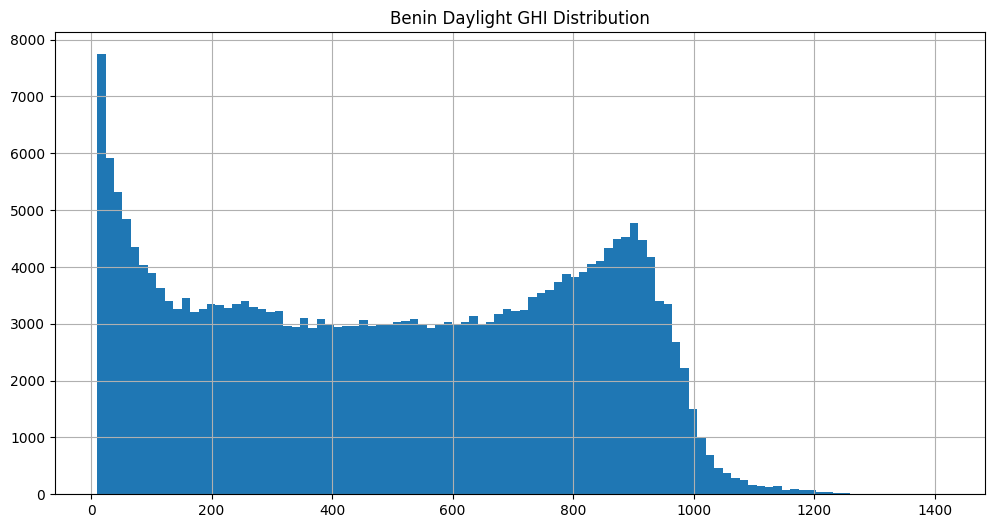

In [45]:
# Benin-specific analysis
benin_day = countries['Benin'][countries['Benin']['GHI'] > 10]
plt.figure(figsize=(12,6))
benin_day['GHI'].hist(bins=100)
plt.title('Benin Daylight GHI Distribution')
# Check DHI=0 cases
sl_zero_dhi = countries['Sierra Leone'][
    (countries['Sierra Leone']['DHI']==0) & 
    (countries['Sierra Leone']['GHI']>0)]
print(f"Sierra Leone DHI=0 cases: {len(sl_zero_dhi)}")
# Verify minimum values
print("Togo GHI min:", countries['Togo']['GHI'].min())
print("Togo DHI min:", countries['Togo']['DHI'].min())

In [46]:
def safe_ratio_analysis(df, numerator, denominator):
    """Robust ratio calculation with validation"""
    valid_mask = (df[numerator].notna() & 
                 df[denominator].notna() & 
                 (df[denominator] > 0))
    
    if valid_mask.sum() == 0:
        return np.nan, 0
    
    ratio = df.loc[valid_mask, numerator] / df.loc[valid_mask, denominator]
    return ratio.mean(), valid_mask.sum()

print("\n=== Validated Ratio Analysis ===")
for name, df in countries.items():
    # DNI/GHI Ratio
    dni_ratio, dni_valid = safe_ratio_analysis(df, 'DNI', 'GHI')
    
    # DHI/GHI Ratio
    dhi_ratio, dhi_valid = safe_ratio_analysis(df, 'DHI', 'GHI')
    
    print(f"\n{name}:")
    print(f"Valid DNI/GHI points: {dni_valid}/{len(df)} ({dni_valid/len(df):.1%})")
    print(f"Mean DNI/GHI ratio: {dni_ratio:.3f}")
    print(f"Valid DHI/GHI points: {dhi_valid}/{len(df)} ({dhi_valid/len(df):.1%})")
    print(f"Mean DHI/GHI ratio: {dhi_ratio:.3f}")


=== Validated Ratio Analysis ===

Benin:
Valid DNI/GHI points: 252356/525600 (48.0%)
Mean DNI/GHI ratio: 0.660
Valid DHI/GHI points: 252223/525600 (48.0%)
Mean DHI/GHI ratio: 0.604

Sierra Leone:
Valid DNI/GHI points: 241258/525600 (45.9%)
Mean DNI/GHI ratio: 0.481
Valid DHI/GHI points: 240901/525600 (45.8%)
Mean DHI/GHI ratio: 0.700

Togo:
Valid DNI/GHI points: 235250/525600 (44.8%)
Mean DNI/GHI ratio: 0.634
Valid DHI/GHI points: 235113/525600 (44.7%)
Mean DHI/GHI ratio: 0.603


In [48]:
def recommend_system_type(df):
    """Robust system type recommendation with proper return values"""
    try:
        # Check if required columns exist
        if not all(col in df.columns for col in ['DNI', 'GHI']):
            return "Missing required columns", np.nan
        
        # Calculate ratio with valid data
        valid_mask = df['DNI'].notna() & df['GHI'].notna() & (df['GHI'] > 0)
        if valid_mask.sum() == 0:
            return "No valid data points", np.nan
        
        ratio = (df.loc[valid_mask, 'DNI'] / df.loc[valid_mask, 'GHI']).mean()
        
        # Determine system type
        if ratio > 0.6:
            return "Tracking system recommended", ratio
        elif ratio < 0.4:
            return "Fixed-tilt system preferred", ratio
        else:
            return "Hybrid approach viable", ratio
            
    except Exception as e:
        return f"Error: {str(e)}", np.nan
results = []
for name, df in countries.items():
    
    # Calculate all metrics
    ghi_rating, ghi_val = evaluate_ghi_potential(df)
    system_rec, dni_ratio = recommend_system_type(df)
    wind_assess, ws_val = evaluate_wind_conditions(df)
    consistency, dhi_ratio = evaluate_consistency(df)
    
    results.append({
        'Country': name,
        'GHI (kWh/m²/day)': f"{ghi_val:.2f} ({ghi_rating})",
        'DNI/GHI Ratio': f"{dni_ratio:.2f} → {system_rec}",
        'Wind 95th % (m/s)': f"{ws_val:.1f} → {wind_assess}",
        'DHI/GHI Ratio': f"{dhi_ratio:.2f} → {consistency}"
    })

comparison_table = pd.DataFrame(results).set_index('Country')
print("\n=== Comprehensive Country Comparison ===")
display(comparison_table)


=== Comprehensive Country Comparison ===


,GHI (kWh/m²/day),DNI/GHI Ratio,Wind 95th % (m/s),DHI/GHI Ratio
Country,,,,
Benin,502.16 (Excellent potential),0.66 → Tracking system recommended,5.0 → May need panel cleaning,0.60 → Diffuse-light resilient
Sierra Leone,438.55 (Excellent potential),0.48 → Hybrid approach viable,3.4 → May need panel cleaning,0.70 → Diffuse-light resilient
Togo,506.28 (Excellent potential),0.63 → Tracking system recommended,5.0 → May need panel cleaning,0.60 → Diffuse-light resilient


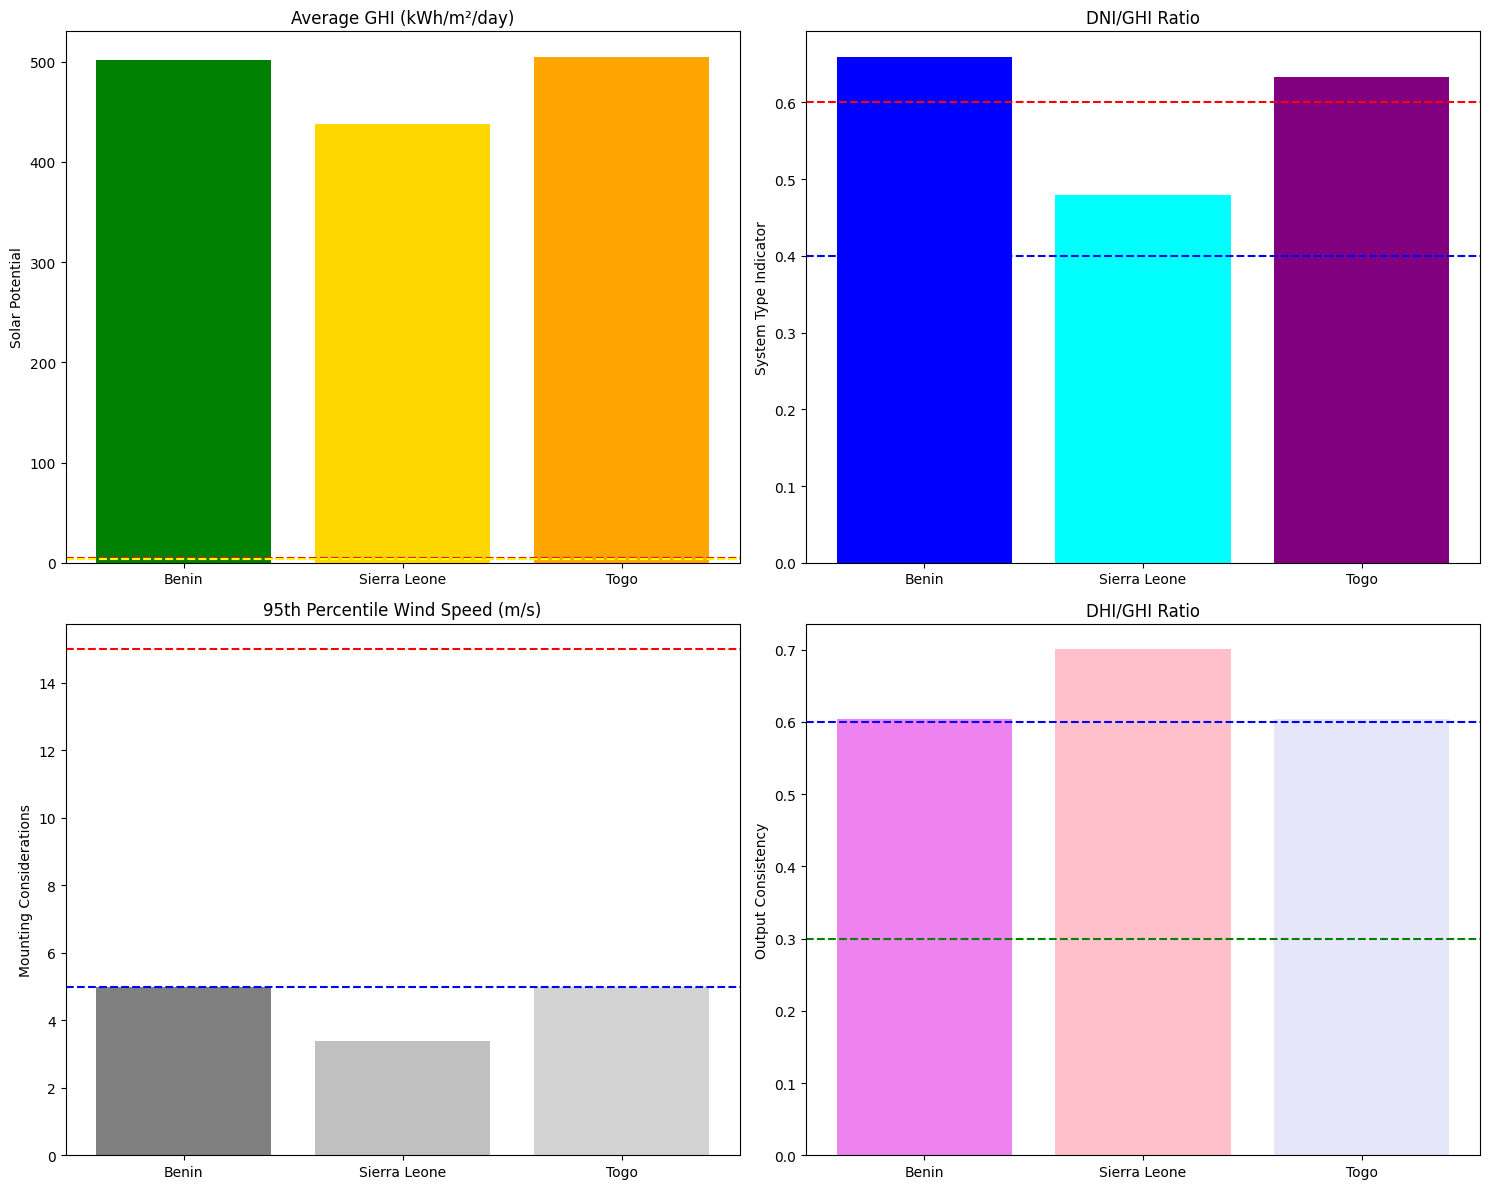

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# GHI Comparison
ghis = [df['GHI'].mean() for df in countries.values()]
axes[0,0].bar(countries.keys(), ghis, color=['green', 'gold', 'orange'])
axes[0,0].axhline(5, color='red', linestyle='--')
axes[0,0].axhline(4, color='orange', linestyle='--')
axes[0,0].axhline(3.5, color='yellow', linestyle='--')
axes[0,0].set_title('Average GHI (kWh/m²/day)')
axes[0,0].set_ylabel('Solar Potential')

# DNI/GHI Ratio
ratios = [(df['DNI']/df['GHI']).mean() for df in countries.values()]
axes[0,1].bar(countries.keys(), ratios, color=['blue', 'cyan', 'purple'])
axes[0,1].axhline(0.6, color='red', linestyle='--')
axes[0,1].axhline(0.4, color='blue', linestyle='--')
axes[0,1].set_title('DNI/GHI Ratio')
axes[0,1].set_ylabel('System Type Indicator')

# Wind Speeds
wind_95s = [df['WS'].quantile(0.95) for df in countries.values()]
axes[1,0].bar(countries.keys(), wind_95s, color=['gray', 'silver', 'lightgray'])
axes[1,0].axhline(15, color='red', linestyle='--')
axes[1,0].axhline(5, color='blue', linestyle='--')
axes[1,0].set_title('95th Percentile Wind Speed (m/s)')
axes[1,0].set_ylabel('Mounting Considerations')

# DHI/GHI Ratio
dhi_ratios = [(df['DHI']/df['GHI']).mean() for df in countries.values()]
axes[1,1].bar(countries.keys(), dhi_ratios, color=['violet', 'pink', 'lavender'])
axes[1,1].axhline(0.3, color='green', linestyle='--')
axes[1,1].axhline(0.6, color='blue', linestyle='--')
axes[1,1].set_title('DHI/GHI Ratio')
axes[1,1].set_ylabel('Output Consistency')

plt.tight_layout()
plt.show()